# 03. Comparing Models

In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model.

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

In [2]:
num_classes = 2
batch_size = 100
image_size = (224, 224)

In [4]:
generator = ImageDataGenerator(preprocessing_function=preprocess_input)

training_generator = generator.flow_from_directory(
    "data/concrete_crack/train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
)
validation_generator = generator.flow_from_directory(
    "data/concrete_crack/valid",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
)

Found 30000 images belonging to 2 classes.
Found 9500 images belonging to 2 classes.


In [5]:
model_vgg16 = Sequential()

model_vgg16.add(VGG16(include_top=False, pooling="avg", weights="imagenet",))
model_vgg16.add(Dense(num_classes, activation="softmax"))

model_vgg16.layers[0].trainable = False

model_vgg16.summary()


58889256/58889256 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 14715714 (56.14 MB)
Trainable params: 1026 (4.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [6]:
model_vgg16.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

**Warning**: next code will be execute more than 30 minutes:

In [7]:
num_epochs = 2
steps_per_epoch_training = len(training_generator)
steps_per_epoch_validation = len(validation_generator)

history_vgg16 = model_vgg16.fit_generator(
    training_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

C:\Users\usman\AppData\Local\Temp\ipykernel_2324\1877265301.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_vgg16 = model_vgg16.fit_generator(


Epoch 1/2


300/300 [==============================] - 860s 3s/step - loss: 0.0972 - accuracy: 0.9718 - val_loss: 0.0293 - val_accuracy: 0.9923
Epoch 2/2
300/300 [==============================] - 876s 3s/step - loss: 0.0232 - accuracy: 0.9944 - val_loss: 0.0173 - val_accuracy: 0.9963


In [8]:
model_vgg16.save("classifier_vgg16_model.h5", include_optimizer=False)

c:\Users\usman\Desktop\122XSUP\week_02\.my_env_02\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [13]:
from keras.models import load_model

model_resnet50 = load_model("classifier_resnet_model.h5")

In [10]:
testing_generator = generator.flow_from_directory(
    "data/concrete_crack/test", target_size=image_size, shuffle=False,
)

Found 500 images belonging to 2 classes.


In [15]:
performance_vgg16 = model_vgg16.evaluate_generator(testing_generator)
print("Performance of the VGG16-trained model")
print("Loss: {}".format(round(performance_vgg16[0], 6)))
print("Accuracy: {}".format(round(performance_vgg16[1], 6)))

C:\Users\usman\AppData\Local\Temp\ipykernel_2324\1079219854.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  performance_vgg16 = model_vgg16.evaluate_generator(testing_generator)


Performance of the VGG16-trained model
Loss: 0.014701
Accuracy: 0.994


In [16]:
performance_resnet50 = model_resnet50.evaluate_generator(testing_generator)
print("Performance of the ResNet50-trained model")
print("Loss: {}".format(round(performance_resnet50[0], 6)))
print("Accuracy: {}".format(round(performance_resnet50[1], 6)))

C:\Users\usman\AppData\Local\Temp\ipykernel_2324\2818973316.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  performance_resnet50 = model_resnet50.evaluate_generator(testing_generator)


Performance of the ResNet50-trained model
Loss: 0.001743
Accuracy: 1.0


## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [34]:
def print_prediction(prediction):
    if prediction[0] > prediction[1]:
        print("Negative ({}% certainty)".format(round(prediction[0] * 100, 4)))
    elif prediction[1] > prediction[0]:
        print("Positive ({}% certainty)".format(round(prediction[1] * 100, 4)))
    else:
        print("Unsure (prediction split 50–50)")

In [29]:
predictions_vgg16 = model_vgg16.predict_generator(testing_generator)

C:\Users\usman\AppData\Local\Temp\ipykernel_2324\2995556555.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_vgg16 = model_vgg16.predict_generator(testing_generator)


In [35]:
print("First five Negative predictions for the VGG16-trained model:")
for i in range(5):
    print_prediction(predictions_vgg16[i])

print("First five Positive predictions for the VGG16-trained model:")
for i in range(250, 255):
    print_prediction(predictions_vgg16[i])    

First five Negative predictions for the VGG16-trained model:
Negative (99.4675% certainty)
Negative (97.6435% certainty)
Negative (96.0879% certainty)
Negative (99.4767% certainty)
Negative (98.274% certainty)
First five Positive predictions for the VGG16-trained model:
Positive (100.0% certainty)
Positive (99.9978% certainty)
Positive (99.9227% certainty)
Positive (99.9277% certainty)
Positive (99.9997% certainty)


In [28]:
predictions_vgg16.shape

(500, 2)

In [32]:
predictions_resnet50 = model_resnet50.predict_generator(testing_generator)

C:\Users\usman\AppData\Local\Temp\ipykernel_2324\4093282812.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_resnet50 = model_resnet50.predict_generator(testing_generator)


In [36]:

print("First five Negative predictions for the ResNet50-trained model:")
for i in range(5):
    print_prediction(predictions_resnet50[i])

print("First five Positive predictions for the ResNet50-trained model:")
for i in range(250, 255):
    print_prediction(predictions_resnet50[i])    

First five Negative predictions for the ResNet50-trained model:
Negative (99.9945% certainty)
Negative (99.97% certainty)
Negative (99.9326% certainty)
Negative (99.922% certainty)
Negative (99.9732% certainty)
First five Positive predictions for the ResNet50-trained model:
Positive (100.0% certainty)
Positive (99.9991% certainty)
Positive (99.2868% certainty)
Positive (99.9665% certainty)
Positive (99.9965% certainty)


## Part 4: My own images

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps

In [75]:
my_directory = 'data/my_cracks/raw/'
convert_directory = 'data/my_cracks/converted/unknown/'
# read data from directory
my_images = os.listdir(my_directory)
my_images

['001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.png']

In [76]:
for image_name in my_images:
    image_data = plt.imread(f'{my_directory}{image_name}')
    print(f'{image_name}: {image_data.shape}')

001.jpg: (900, 1200, 3)
002.jpg: (1505, 1668, 3)
003.jpg: (912, 1124, 3)
004.jpg: (667, 1000, 3)
005.png: (837, 1191, 4)


In [77]:
my_image_size = (224, 224)
my_image_type = 'jpg'

In [78]:
for image_name in my_images:
    with Image.open(my_directory + image_name) as im:
        image_name_short = image_name.split('.')
        
        width, height = im.size   # Get dimensions

        square_size = min(width, height)

        left = (width - square_size)/2
        top = (height - square_size)/2
        right = (width + square_size)/2
        bottom = (height + square_size)/2

        # Crop the center of the image
        im = im.crop((left, top, right, bottom))

        if image_name_short[1] not in ['jpg', 'jpeg']:
            im = im.convert('RGB')

        im.thumbnail(my_image_size)
        im.save(convert_directory + image_name_short[0] + '.jpg', format="jpeg")


In [79]:
# read data from directory
conv_images = os.listdir(convert_directory)
conv_images

for conv_image_name in conv_images:
    conv_image_data = plt.imread(f'{convert_directory}{conv_image_name}')
    print(f'{conv_image_name}: {conv_image_data.shape}')

001.jpg: (224, 224, 3)
002.jpg: (224, 224, 3)
003.jpg: (224, 224, 3)
004.jpg: (224, 224, 3)
005.jpg: (224, 224, 3)


In [81]:
my_generator = generator.flow_from_directory(
    "data/my_cracks/converted/", target_size=image_size, shuffle=False,
)

Found 5 images belonging to 1 classes.


In [83]:
my_predictions_vgg16 = model_vgg16.predict_generator(my_generator)

C:\Users\usman\AppData\Local\Temp\ipykernel_2324\3899002779.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  my_predictions_vgg16 = model_vgg16.predict_generator(my_generator)


First five predictions for the VGG16-trained model:

Positive (99.9987% certainty)


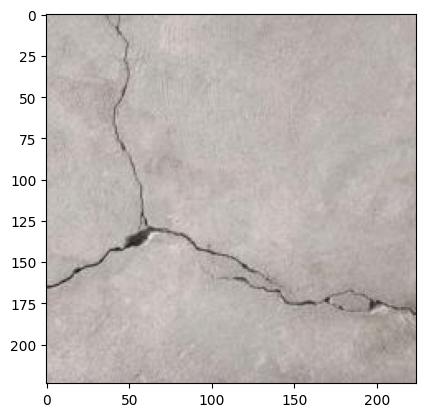

Negative (66.927% certainty)


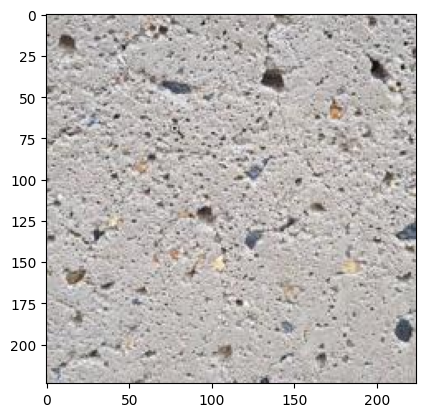

Positive (99.9776% certainty)


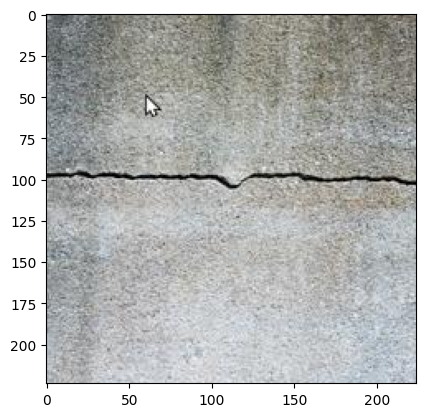

Negative (97.1722% certainty)


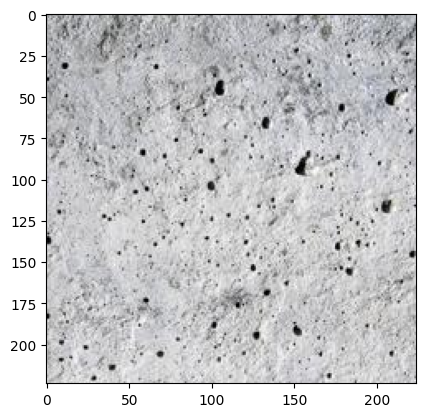

Negative (99.3682% certainty)


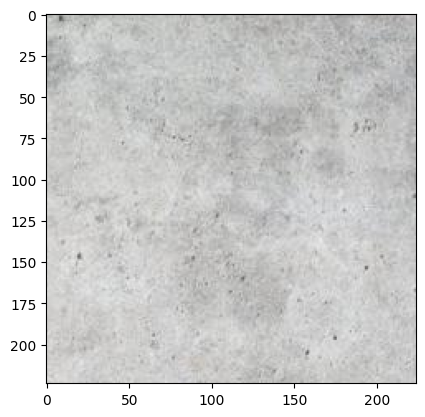

In [91]:
print("First five predictions for the VGG16-trained model:\n")
for i in range(5):
    title = print_prediction(my_predictions_vgg16[i])
    my_image_data = Image.open(f'{convert_directory}{conv_images[i]}')
    plt.imshow(my_image_data)
    plt.title(title)
    plt.show()    

In [85]:
my_predictions_resnet50 = model_resnet50.predict_generator(my_generator)

C:\Users\usman\AppData\Local\Temp\ipykernel_2324\2076999708.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  my_predictions_resnet50 = model_resnet50.predict_generator(my_generator)


First five predictions for the ResNet50-trained model:

Positive (99.9979% certainty)


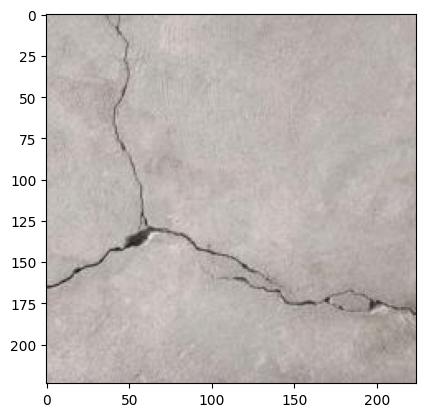

Negative (99.9498% certainty)


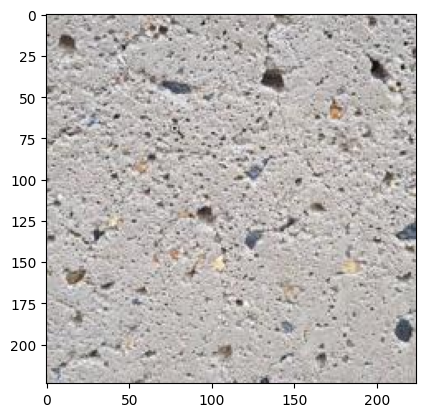

Positive (99.9445% certainty)


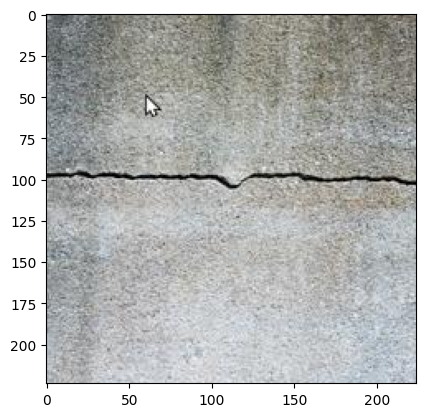

Negative (99.5462% certainty)


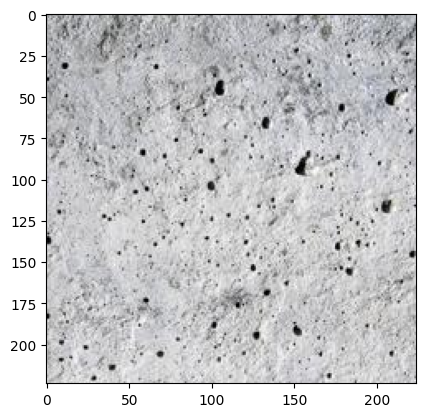

Negative (99.9626% certainty)


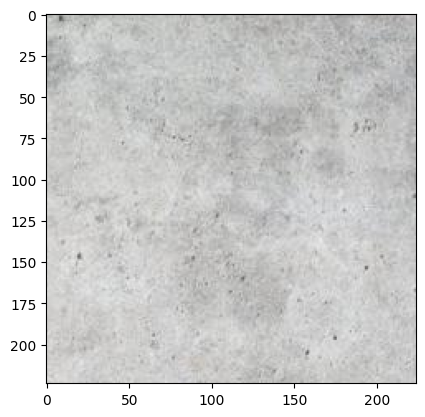

In [92]:
print("First five predictions for the ResNet50-trained model:\n")
for i in range(5):
    title = print_prediction(my_predictions_resnet50[i])
    my_image_data = Image.open(f'{convert_directory}{conv_images[i]}')
    plt.imshow(my_image_data)
    plt.title(title)
    plt.show()